In [50]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

#modeling libraries
from sklearn.metrics import mean_squared_error,r2_score,mean_absolute_error
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor,AdaBoostRegressor
from sklearn.linear_model import LinearRegression,Ridge,Lasso
from sklearn.svm import SVR
from sklearn.model_selection import RandomizedSearchCV
from catboost import CatBoostRegressor
from xgboost import XGBRegressor
import warnings




In [51]:
df=pd.read_csv('C:\\Users\\admin\\Desktop\\MACHINE_LEARNING_CODES\\ML_PROJECT\\notebook\\data\\StudentsPerformance.csv')

In [ ]:
df.head()

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75


In [53]:
x=df.drop(columns=["math score"],axis=1)

In [54]:
x

,gender,race/ethnicity,parental level of education,lunch,test preparation course,reading score,writing score
0,female,group B,bachelor's degree,standard,none,72,74
1,female,group C,some college,standard,completed,90,88
2,female,group B,master's degree,standard,none,95,93
3,male,group A,associate's degree,free/reduced,none,57,44
4,male,group C,some college,standard,none,78,75
...,...,...,...,...,...,...,...
995,female,group E,master's degree,standard,completed,99,95
996,male,group C,high school,free/reduced,none,55,55
997,female,group C,high school,free/reduced,completed,71,65
998,female,group D,some college,standard,completed,78,77


In [55]:
y=df["math score"]

In [56]:
y

0      72
1      69
2      90
3      47
4      76
       ..
995    88
996    62
997    59
998    68
999    77
Name: math score, Length: 1000, dtype: int64

In [57]:
df.head()

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75


In [58]:
#create Column Transformer with 3 types of transformers
num_features =x.select_dtypes(exclude='object').columns
cat_features = x.select_dtypes(include='object').columns

from sklearn.preprocessing import StandardScaler,OneHotEncoder
from sklearn.compose import ColumnTransformer
numeric_features=StandardScaler()
oh_transformer=OneHotEncoder()

preprocessor=ColumnTransformer(
[
    ("OneHotEncoder",oh_transformer,cat_features),
    ("StandardScaler",numeric_features,num_features)
]
)

In [59]:
x=preprocessor.fit_transform(x)

In [60]:
x

array([[ 1.        ,  0.        ,  0.        , ...,  1.        ,
         0.19399858,  0.39149181],
       [ 1.        ,  0.        ,  0.        , ...,  0.        ,
         1.42747598,  1.31326868],
       [ 1.        ,  0.        ,  0.        , ...,  1.        ,
         1.77010859,  1.64247471],
       ...,
       [ 1.        ,  0.        ,  0.        , ...,  0.        ,
         0.12547206, -0.20107904],
       [ 1.        ,  0.        ,  0.        , ...,  0.        ,
         0.60515772,  0.58901542],
       [ 1.        ,  0.        ,  0.        , ...,  1.        ,
         1.15336989,  1.18158627]], shape=(1000, 19))

In [61]:
x.shape

(1000, 19)

In [62]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=42)

In [63]:
x_train.shape,x_test.shape

((800, 19), (200, 19))

In [64]:
def evaluate_model(true,predicted):
    mae=mean_absolute_error(true,predicted)
    mse=mean_squared_error(true,predicted)
    rmse=np.sqrt(mean_squared_error(true,predicted))
    r2_score1=r2_score(true,predicted)
    return mae,mse,rmse,r2_score1


In [65]:
models={
"linear regression": LinearRegression(),
"lasso": Lasso(),
"ridge": Ridge(),
"knn": KNeighborsRegressor(),
"dt": DecisionTreeRegressor(),
"rfr": RandomForestRegressor(),
"xg": XGBRegressor(),
"cat": CatBoostRegressor(verbose=False),
"AdaBoost": AdaBoostRegressor()
}

# re-initialize or reset lists for this run
models_list = []
r2_list = []

for model_name, model in models.items():
    try:
        # train model
        model.fit(x_train, y_train)

        # make prediction
        y_train_pred = model.predict(x_train)
        y_test_pred = model.predict(x_test)

        # Evaluate Train and Test dataset
        model_train_mae, model_train_mse, model_train_rmse, model_train_R2 = evaluate_model(y_train, y_train_pred)
        model_test_mae, model_test_mse, model_test_rmse, model_test_R2 = evaluate_model(y_test, y_test_pred)

        print(model_name)
        models_list.append(model_name)
        r2_list.append(model_test_R2)  # Append the R2 score to the list

        print("MODEL PERFORMANCE FOR TRAINING SET:")
        print(f"MAE: {model_train_mae:.4f}")
        print(f"MSE: {model_train_mse:.4f}")
        print(f"RMSE: {model_train_rmse:.4f}")
        print(f"R2: {model_train_R2:.4f}")

        print("-------------------------------------")

        print("MODEL PERFORMANCE FOR TEST SET:")
        print(f"MAE: {model_test_mae:.4f}")
        print(f"MSE: {model_test_mse:.4f}")
        print(f"RMSE: {model_test_rmse:.4f}")
        print(f"R2: {model_test_R2:.4f}")

        print("*************************************")

    except Exception as e:
        # catch and report any error but continue with other models
        print(f"Error with model '{model_name}': {e}")
        models_list.append(model_name)
        r2_list.append(np.nan)
        print("*************************************")

linear regression
MODEL PERFORMANCE FOR TRAINING SET:
MAE: 4.2667
MSE: 28.3349
RMSE: 5.3231
R2: 0.8743
-------------------------------------
MODEL PERFORMANCE FOR TEST SET:
MAE: 4.2148
MSE: 29.0952
RMSE: 5.3940
R2: 0.8804
*************************************
lasso
MODEL PERFORMANCE FOR TRAINING SET:
MAE: 5.2063
MSE: 43.4784
RMSE: 6.5938
R2: 0.8071
-------------------------------------
MODEL PERFORMANCE FOR TEST SET:
MAE: 5.1579
MSE: 42.5064
RMSE: 6.5197
R2: 0.8253
*************************************
ridge
MODEL PERFORMANCE FOR TRAINING SET:
MAE: 4.2650
MSE: 28.3378
RMSE: 5.3233
R2: 0.8743
-------------------------------------
MODEL PERFORMANCE FOR TEST SET:
MAE: 4.2111
MSE: 29.0563
RMSE: 5.3904
R2: 0.8806
*************************************
knn
MODEL PERFORMANCE FOR TRAINING SET:
MAE: 4.5175
MSE: 32.5934
RMSE: 5.7091
R2: 0.8554
-------------------------------------
MODEL PERFORMANCE FOR TEST SET:
MAE: 5.6370
MSE: 52.6834
RMSE: 7.2583
R2: 0.7835
************************************

In [66]:
R2_score_dataframe=pd.DataFrame(list(zip(models_list,r2_list)),columns=["Model Name","R2_Score"]).sort_values(by=["R2_Score"],ascending=False)

In [67]:
R2_score_dataframe


,Model Name,R2_Score
2,ridge,0.880593
0,linear regression,0.880433
7,cat,0.851632
8,AdaBoost,0.850220
5,rfr,0.848556
6,xg,0.827797
1,lasso,0.825320
3,knn,0.783497
4,dt,0.758032


LINEAR REGRESSION

In [79]:
lin_model=LinearRegression()
lin_model.fit(x_train,y_train)
y_pred=lin_model.predict(x_test)
score=r2_score(y_test,y_pred) 
print("R2 score:%.2f"%score)

R2 score:0.88


Text(0, 0.5, 'Predicted Values')

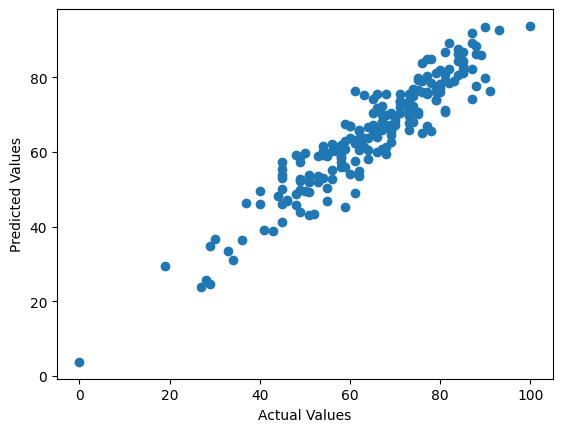

In [80]:
plt.scatter(y_test,y_pred)
plt.xlabel("Actual Values")
plt.ylabel("Predicted Values")

<Axes: xlabel='math score'>

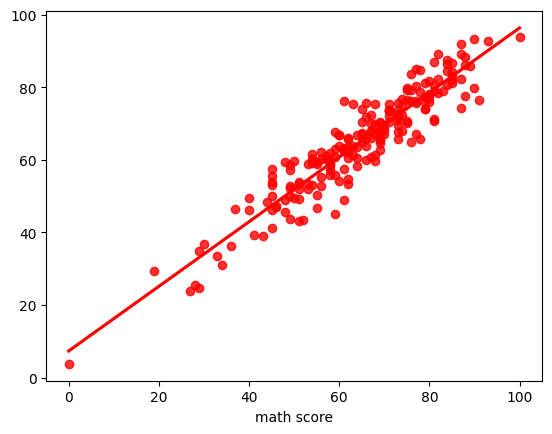

In [81]:
sns.regplot(x=y_test,y=y_pred,ci=None,color='red')

In [82]:
pred_df=pd.DataFrame({"Actual Values":y_test,"Predicted Values":y_pred,"Difference":y_test - y_pred})
pred_df

,Actual Values,Predicted Values,Difference
521,91,76.387970,14.612030
737,53,58.885970,-5.885970
740,80,76.990265,3.009735
660,74,76.851804,-2.851804
411,84,87.627378,-3.627378
...,...,...,...
408,52,43.409149,8.590851
332,62,62.152214,-0.152214
208,74,67.888395,6.111605
613,65,67.022287,-2.022287
